## 1. Load Data and Load Existing Booster

In [1]:
import sys
sys.path.append("../..")

In [14]:
import lightgbm as lgb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ipywidgets import interact

# Load dataset and models
from network_ad.supervised.lgbm_dataset import LightGBMDataset
from network_ad.config import LOGS_DIR, TRAIN_DATA_PATH, TEST_DATA_PATH

MULTICLASS = False  # Set as per requirement

MODEL_FILE = LOGS_DIR / "lgbm_nl.10_e.1_binary/model.txt"

# Load dataset
dataset = LightGBMDataset(
    train_path=TRAIN_DATA_PATH,
    test_path=TEST_DATA_PATH,
    multiclass=MULTICLASS
)
dataset.setup()

# Load existing booster
booster = lgb.Booster(model_file=MODEL_FILE)

## 2. Compute and Plot Feature Importance
---------------------------------------------

LightGbm provides two types of feature importance:

1. **Split Importance**: Number of times a feature is used to split the data across all trees.
2. **Gain Importance**: Total gain of splits which use the feature.

In practice, gain importance is more useful as it provides a better measure of the contribution of the feature to the model.



In [15]:
# Compute feature importances
split_importance = booster.feature_importance(importance_type="split")
gain_importance = booster.feature_importance(importance_type="gain")

In [16]:
def plot_importance(importance, title):
    # Create a dataframe of feature importance and sort it
    importance_df = pd.DataFrame({
        "feature": dataset.numerical_features+dataset.categorical_features,
        "importance": importance
    })
    importance_df = importance_df.sort_values(by="importance", ascending=False)

    # Plot the feature importance
    plt.figure(figsize=(20, 10))
    sns.barplot(x="importance", y="feature", data=importance_df)
    plt.title(title)
    plt.show()


## 2.1. Plot gain importance

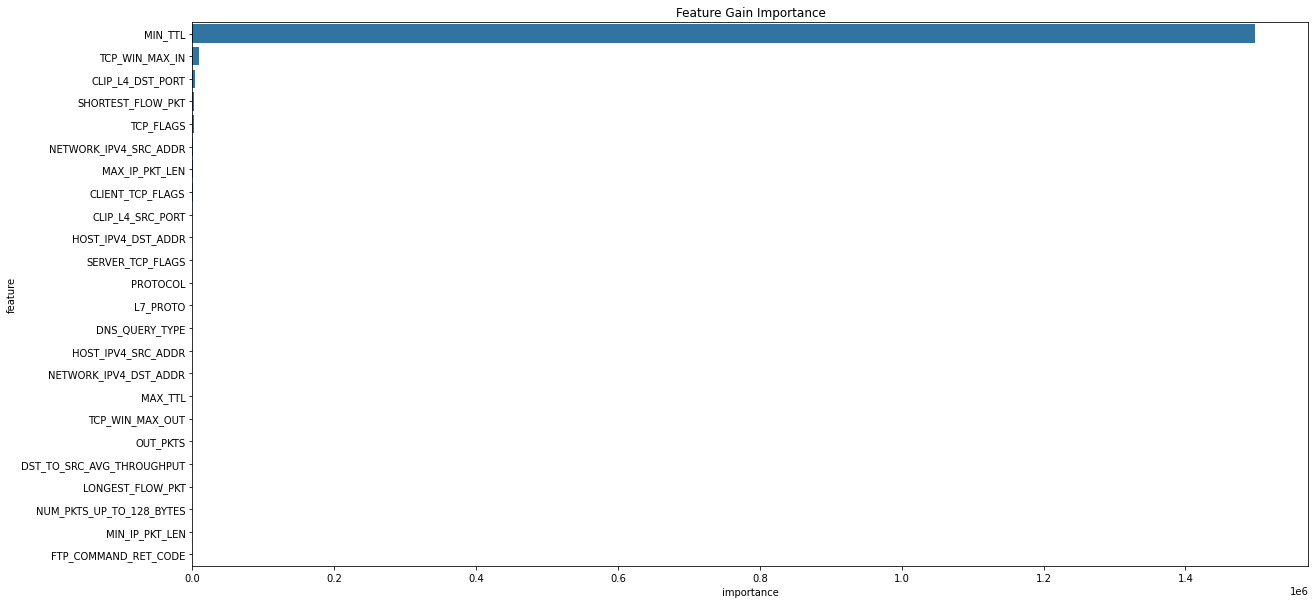

In [17]:
plot_importance(gain_importance, "Feature Gain Importance")

## 2.2. Plot split importance

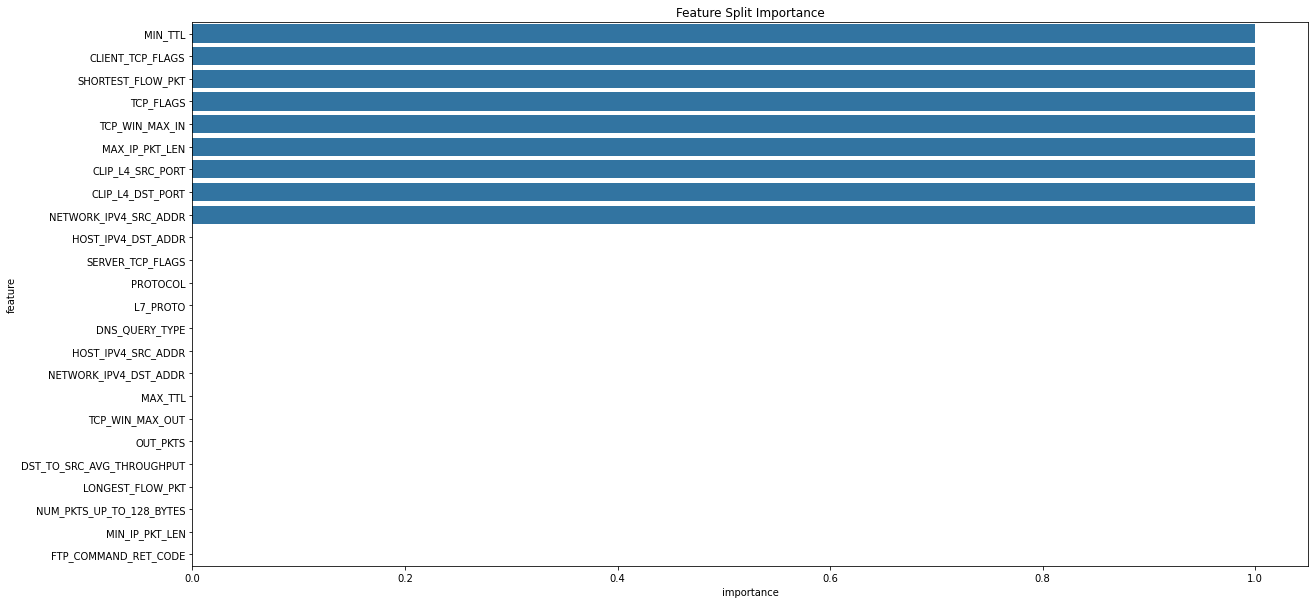

In [18]:
plot_importance(split_importance, "Feature Split Importance")

## 3. Plot Decision Tree

In [19]:
#!pip install pydot-ng
# If Linux
## Run the following line in an external terminal :
##- sudo apt install graphviz
## Restart the jupyter kernel

#If Windows
## Download and install it from : 
## - https://graphviz.org/download/
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin\\'

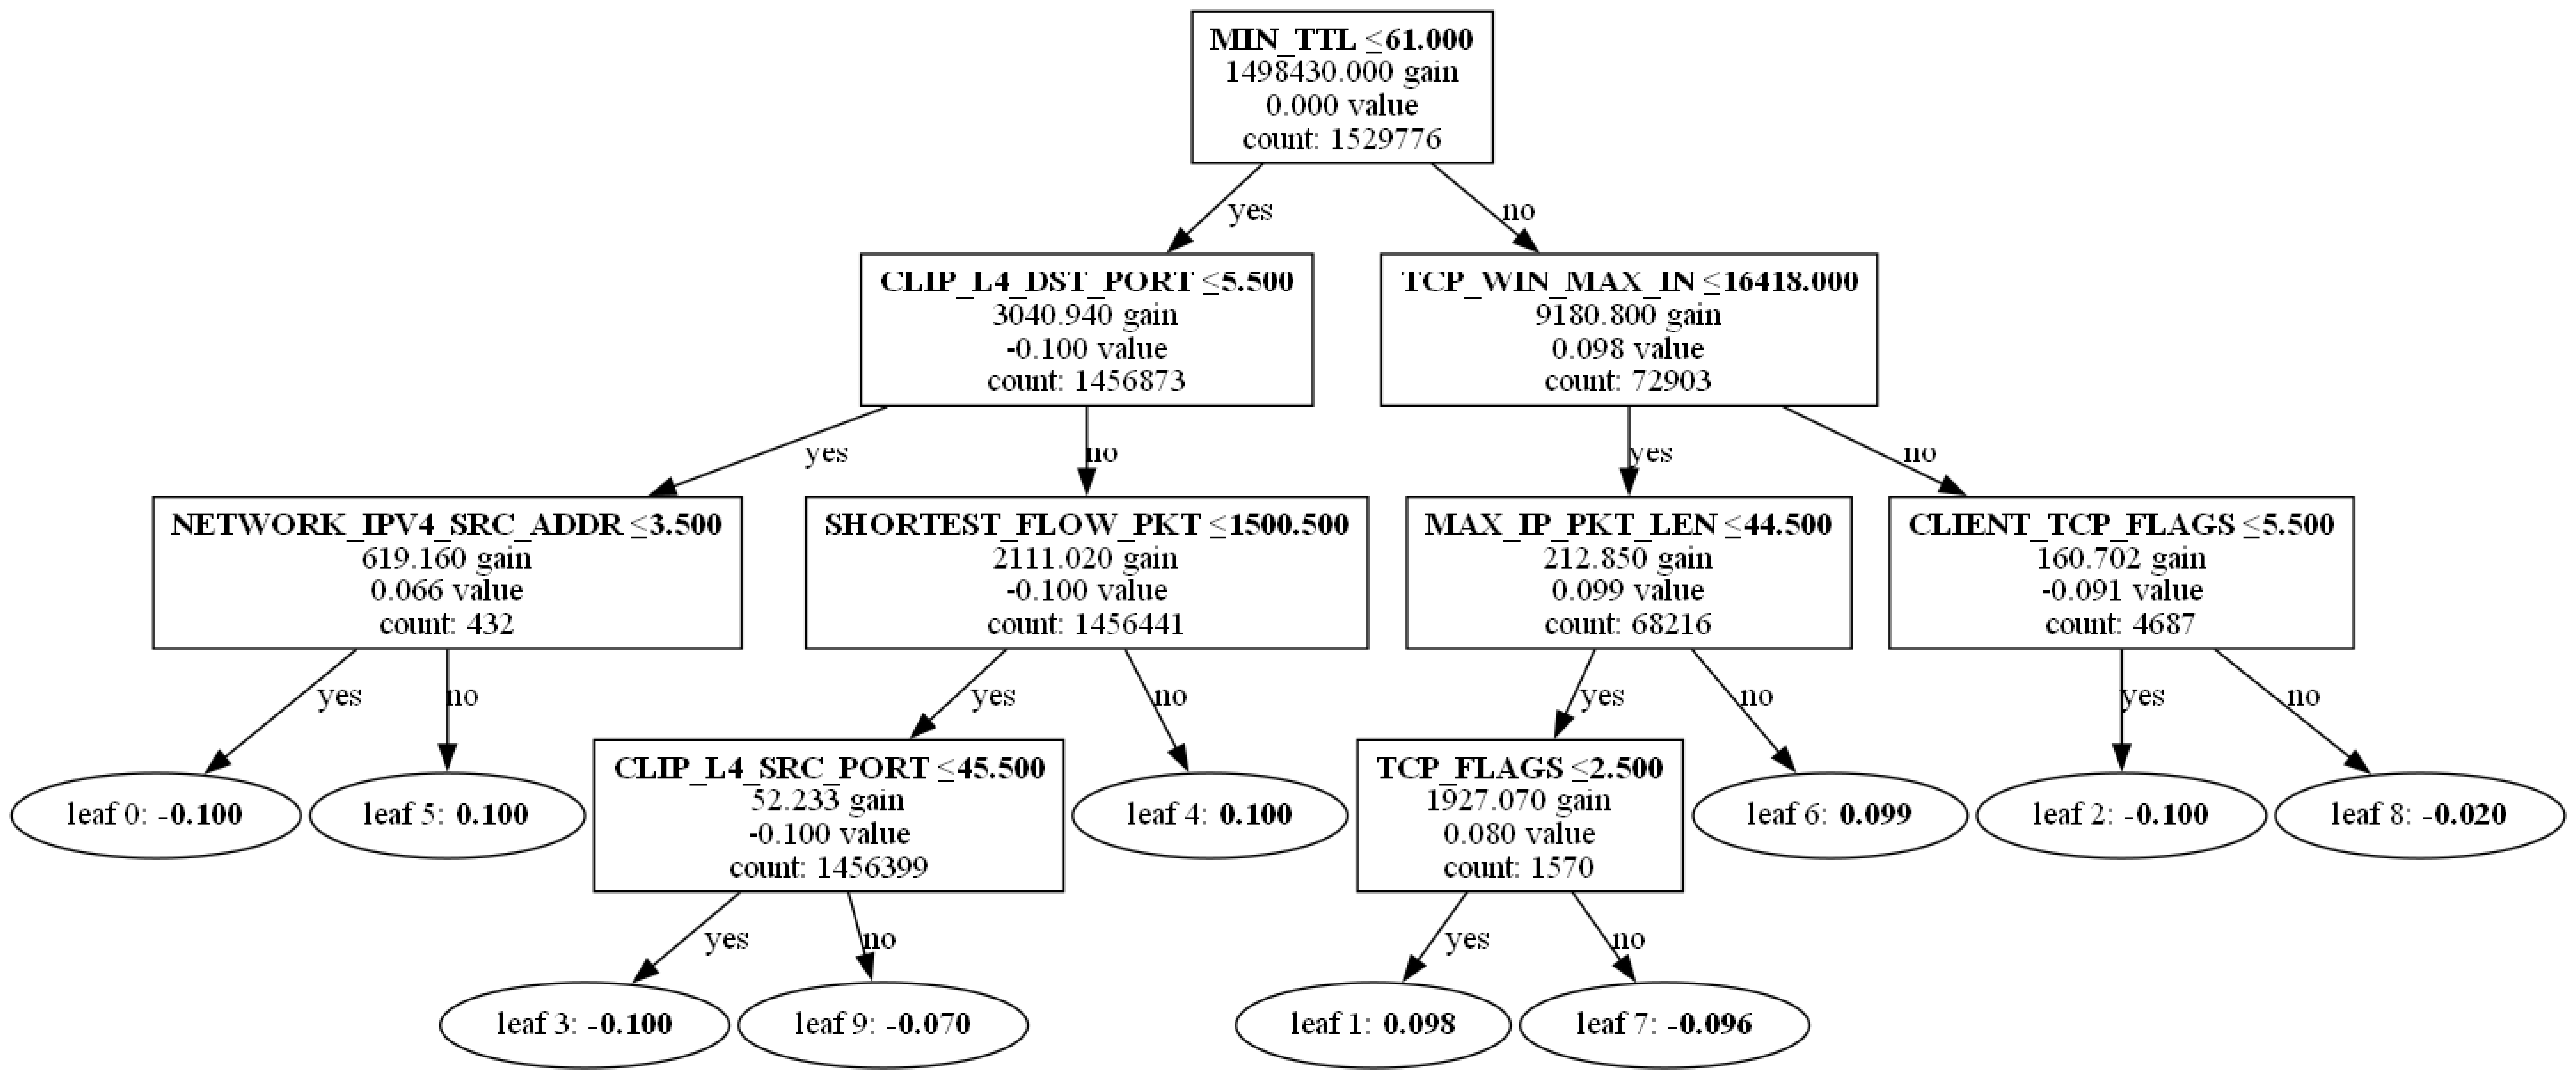

In [20]:
#!pip install graphviz
def plot_tree(tree_index):
    lgb.plot_tree(booster, tree_index=tree_index, show_info=["split_gain", "internal_value", "internal_count"], orientation="vertical",
                 figsize=(150,150))
    

plot_tree(0)